In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
#%matplotlib inline

In [147]:
%matplotlib notebook

In [190]:
# create a initial grid
grid_size = 50    #evetually define as an input
grid = np.zeros((grid_size,grid_size))

In [191]:
# define the initial pattern
grid[int(grid_size/2), int(grid_size/2)]=2
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [192]:
def show_grid(im_grid):
    plt.imshow(im_grid, cmap=plt.cm.gray)
    plt.colorbar()
    plt.show()

In [193]:
show_grid(grid)

In [194]:
# Define rules

def rule1(grid):
    # 2 = live cell
    # 1 = not dividing cell
    # 0 = empty space
    
    #this rule makes each cell divide only one time per step
    new_grid = grid   #to separate the evaluation from the actualization
    #g_ones = grid[grid == 1] 
    g_ones_index =  np.nonzero(grid == 2) # index where cell value == 2
    #g_mask = np.array([[0,1,2],[3,8,4],[5,6,7]]) #position 8 is the center and not selectable
    
    
    for i in range(len(g_ones_index[0])):  #go through every position with a "live cell" ---> value = 1
        
        mask_pos = np.array([[-1,-1],[0,-1],[1,-1],[-1,0],[1,0],[-1,1],[0,1],[1,1]])
        
        # go through every position surrounding position --> eigh posibilities
        remove_list = []  #initialize list to store positions where value = 2
        
        for j in range(len(mask_pos)):

            m = g_ones_index[0][i] + mask_pos[j][0]
            n = g_ones_index[1][i] + mask_pos[j][1]

            if grid[m,n] !=0 :  #make a list with the positions which are not empty places
                
                remove_list.append(j)

        new_mask_pos = np.delete(mask_pos, remove_list, 0)        

        # to exit when there is not a surrounding empty position
        l = len(new_mask_pos)
        if l > 1:
            r_pos = np.random.randint(l)   # a random number between [0,len[
            new_pos = new_mask_pos[r_pos]

            #m = g_ones_index[0][i] + mask_pos[new_pos][0]
            #n = g_ones_index[1][i] + mask_pos[new_pos][1]
            m = g_ones_index[0][i] + new_pos[0]
            n = g_ones_index[1][i] + new_pos[1]
            grid[m,n] = 2

        elif l == 1:
            
            new_pos = new_mask_pos[0]

            m = g_ones_index[0][i] + new_pos[0]
            n = g_ones_index[1][i] + new_pos[1]
            
            grid[m,n] = 2

        else: #when len(new_mask_pos) == 0
            m = g_ones_index[0][i]
            n = g_ones_index[1][i]
            grid[m,n] = 1     # then, that position will not be evaluated again
            
    return(grid)

<IPython.core.display.Javascript object>


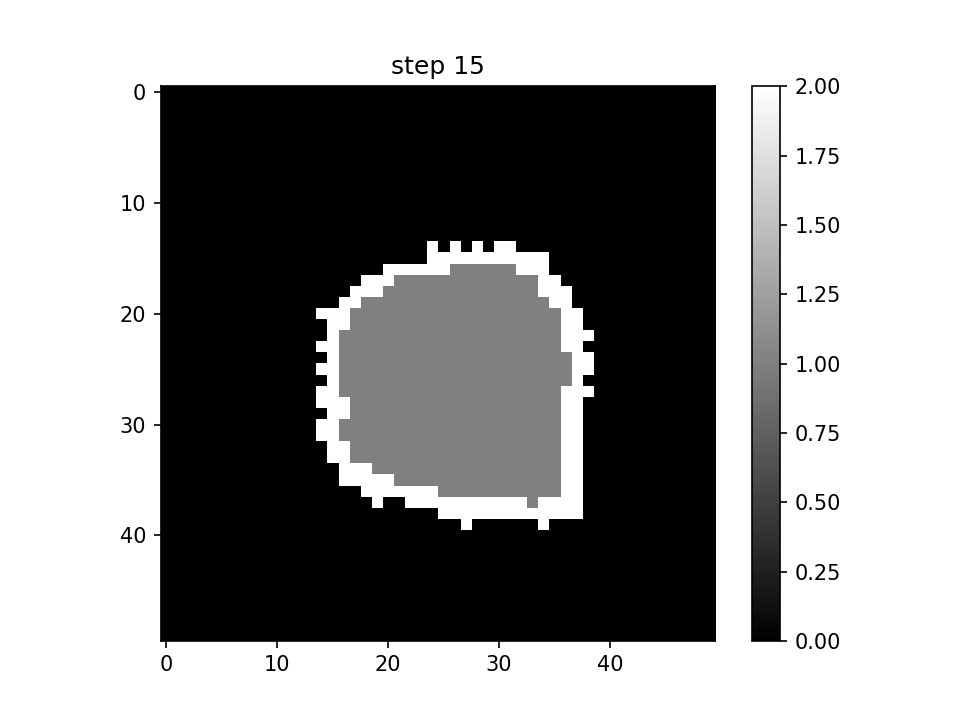

In [195]:
#perform the loop
steps = 15
sleep_time = 0.5

fig = plt.figure()
fig.show()
show_grid(grid)  #show the initial grid
plt.title('step 0')

for i  in range(steps):
    time.sleep(sleep_time)    
    grid = rule1(grid)
    plt.imshow(grid, cmap=plt.cm.gray)
    plt.title('step '+ str(i+1))
    fig.canvas.draw()
  

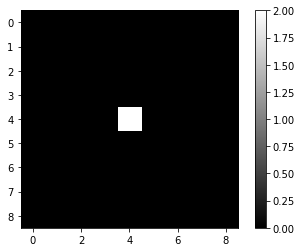

[-1  0]


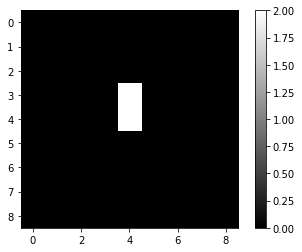

[ 1 -1]
[-1 -1]


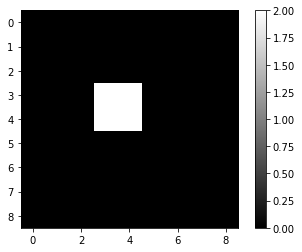

[-1  0]
[1 1]
[-1 -1]
[1 0]


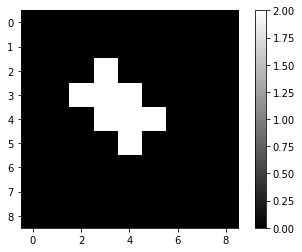

[-1  0]
[-1  0]
[ 1 -1]
[0 1]
[1 0]
[-1  1]
[1 0]


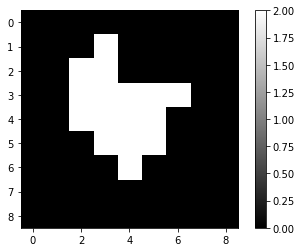

[0 1]
[ 1 -1]
[0 1]
[ 1 -1]
[-1  1]
[1 0]
[ 1 -1]
[1 0]
[1 0]


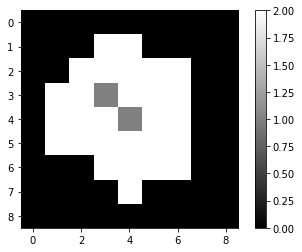

[-1 -1]
[-1 -1]
[-1 -1]
[1 1]
[-1  0]
[-1  1]
[-1 -1]
[1 1]
[1 1]
[-1  1]
[1 0]
[0 1]
[1 1]


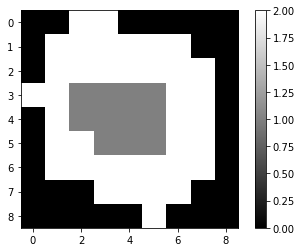

[-1 -1]
[-1 -1]
[ 1 -1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 1]
[1 1]
[1 1]
[1 0]


IndexError: index 9 is out of bounds for axis 0 with size 9

In [140]:
#perform the loop
steps = 10
sleep_time = 0.5

show_grid(grid)  #show the initial grid
plt.figure(0)
for i  in range(steps):
    time.sleep(sleep_time)    
    grid = rule1(grid)
    show_grid(grid)
    

In [45]:
grid[1,1] == 0

True

In [92]:
mask = np.array([[0,1,2],[3,8,4],[5,6,7]])
for i in range(len(mask)):
    
    print(i)

0
1
2


In [103]:
mask[1,2]

4

In [111]:
vals = np.array([[-1,-1],[0,-1],[1,-1],[-1,0],[1,0],[-1,1],[0,1],[1,1],[0,0]])
vals[4][1]

0

In [109]:
pos = np.nonzero(grid == 0)
print(pos[0][10])

1


In [82]:
len(pos[1])

80

In [50]:
grid[grid == 1]

array([1.])

In [ ]:
#make automata loop

time_steps = 100

for t in time_steps:
    

In [46]:
np.random.randint(8) # a random number between [0,8[ --> eigh posibilities

6

In [45]:
grid[0,0]

0.0